In [1]:
from google.colab import drive
import os
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd

# 파일에서 데이터를 읽습니다. header=None 은 파일에 컬럼명이 없다는 것을 의미합니다.
df = pd.read_csv("/content/drive/MyDrive/IOT Hack/archive (4)/anno_test.csv", header=None)

# 새로운 컬럼 이름을 지정합니다. 컬럼의 개수에 맞춰 이름을 제공해야 합니다.
column_names = ['image', 'x1', 'y1', 'x2', 'y2', 'class']
if df.shape[1] == len(column_names):
    df.columns = column_names
else:
    print(f"Warning: DataFrame has {df.shape[1]} columns, but {len(column_names)} column names were provided.")

# 첫 번째 행에 추가할 데이터를 DataFrame으로 생성합니다.
new_row = pd.DataFrame([['00001.jpg', 39, 116, 569, 375, 14]], columns=column_names)

# 새로운 행을 기존 데이터프레임 위에 추가합니다.
df = pd.concat([new_row, df]).reset_index(drop=True)

# 결과를 출력합니다.
df

,image,x1,y1,x2,y2,class
0,00001.jpg,39,116,569,375,14
1,00001.jpg,30,52,246,147,181
2,00002.jpg,100,19,576,203,103
3,00003.jpg,51,105,968,659,145
4,00004.jpg,67,84,581,407,187
...,...,...,...,...,...,...
8037,08037.jpg,49,57,1169,669,63
8038,08038.jpg,23,18,640,459,16
8039,08039.jpg,33,27,602,252,17
8040,08040.jpg,33,142,521,376,38


In [30]:
# 클래스 이름 매핑 파일을 읽어들입니다.
class_names_df = pd.read_csv("/content/drive/MyDrive/IOT Hack/archive (4)/names.csv")

class_names_df

,AM General Hummer SUV 2000
0,Acura RL Sedan 2012
1,Acura TL Sedan 2012
2,Acura TL Type-S 2008
3,Acura TSX Sedan 2012
4,Acura Integra Type R 2001
...,...
190,Volkswagen Beetle Hatchback 2012
191,Volvo C30 Hatchback 2012
192,Volvo 240 Sedan 1993
193,Volvo XC90 SUV 2007


In [31]:
import pandas as pd

# 가정: class_names_df는 차량의 클래스 이름이 있는 데이터프레임입니다.
# 데이터프레임의 모든 값을 한 행씩 아래로 이동시킵니다.
class_names_df['class_name'] = class_names_df.iloc[:,0].shift(1)

# 맨 마지막 행에 새로운 데이터를 추가합니다.
new_row = pd.DataFrame({'class_name': ['smart fortwo Convertible 2012']})
class_names_df = pd.concat([class_names_df, new_row], ignore_index=True)

# 첫 번째 행에 'AM General Hummer SUV 2000'을 삽입합니다.
class_names_df.at[0, 'class_name'] = 'AM General Hummer SUV 2000'

# 결과를 확인합니다.
print(class_names_df)

        AM General Hummer SUV 2000                        class_name
0              Acura RL Sedan 2012        AM General Hummer SUV 2000
1              Acura TL Sedan 2012               Acura RL Sedan 2012
2             Acura TL Type-S 2008               Acura TL Sedan 2012
3             Acura TSX Sedan 2012              Acura TL Type-S 2008
4        Acura Integra Type R 2001              Acura TSX Sedan 2012
..                             ...                               ...
191       Volvo C30 Hatchback 2012  Volkswagen Beetle Hatchback 2012
192           Volvo 240 Sedan 1993          Volvo C30 Hatchback 2012
193            Volvo XC90 SUV 2007              Volvo 240 Sedan 1993
194  smart fortwo Convertible 2012               Volvo XC90 SUV 2007
195                            NaN     smart fortwo Convertible 2012

[196 rows x 2 columns]


In [33]:
class_names_df['class_name'][105]

'Ford F-450 Super Duty Crew Cab 2012'

In [34]:
# 기존 인덱스를 'index'라는 새로운 컬럼으로 만듭니다.
class_names_df = class_names_df.reset_index().rename(columns={'index':'index_column'})

In [36]:
class_names_df = class_names_df.drop('AM General Hummer SUV 2000', axis=1)

In [37]:
class_names_df

,index_column,class_name
0,0,AM General Hummer SUV 2000
1,1,Acura RL Sedan 2012
2,2,Acura TL Sedan 2012
3,3,Acura TL Type-S 2008
4,4,Acura TSX Sedan 2012
...,...,...
191,191,Volkswagen Beetle Hatchback 2012
192,192,Volvo C30 Hatchback 2012
193,193,Volvo 240 Sedan 1993
194,194,Volvo XC90 SUV 2007


In [38]:
class_names_df.head(50)

,index_column,class_name
0,0,AM General Hummer SUV 2000
1,1,Acura RL Sedan 2012
2,2,Acura TL Sedan 2012
3,3,Acura TL Type-S 2008
4,4,Acura TSX Sedan 2012
5,5,Acura Integra Type R 2001
6,6,Acura ZDX Hatchback 2012
7,7,Aston Martin V8 Vantage Convertible 2012
8,8,Aston Martin V8 Vantage Coupe 2012
9,9,Aston Martin Virage Convertible 2012


In [ ]:
rows_50_to_99 = class_names_df.iloc[50:100]
rows_50_to_99

In [ ]:
rows_100_to_150 = class_names_df.iloc[100:150]
rows_100_to_150

In [43]:
rows_150_to_196 = class_names_df.iloc[149:196]
rows_150_to_196

,index_column,class_name
149,149,Lamborghini Reventon Coupe 2008
150,150,Lamborghini Aventador Coupe 2012
151,151,Lamborghini Gallardo LP 570-4 Superleggera 2012
152,152,Lamborghini Diablo Coupe 2001
153,153,Land Rover Range Rover SUV 2012
154,154,Land Rover LR2 SUV 2012
155,155,Lincoln Town Car Sedan 2011
156,156,MINI Cooper Roadster Convertible 2012
157,157,Maybach Landaulet Convertible 2012
158,158,Mazda Tribute SUV 2011


# Train and prediction

In [3]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os

image_size = 224
batch_size = 32
num_workers = 4

## Data directoris
# Local Paths
train_dir = "/content/drive/MyDrive/IOT Hack/archive (4)/car_data/car_data/train"
valid_dir = "/content/drive/MyDrive/IOT Hack/archive (4)/car_data/car_data/test"

train_images = os.listdir(train_dir)
valid_images = os.listdir(valid_dir)

## Data Augmentation
# Training Data Transforms
def get_train_transform(image_size):
  train_transform = transforms.Compose([
      transforms.Resize((image_size, image_size)),
      transforms.RandomHorizontalFlip(p=0.5),
      transforms.RandomRotation(35),
      transforms.RandomAdjustSharpness(sharpness_factor=2, p=0.5),
      transforms.RandomGrayscale(p=0.5),
      transforms.RandomPerspective(distortion_scale=0.5, p=0.5),
      transforms.RandomPosterize(bits=2, p=0.5),
      transforms.ToTensor(),
      transforms.Normalize(
          mean=[0.485, 0.456, 0.406],
          std=[0.229, 0.224, 0.225]
          )
  ])
  return train_transform

# Validation Data Transforms
def get_valid_transform(image_size):
    valid_transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
            )
    ])
    return valid_transform

def get_datasets():
    """
    Function to prepare the Datasets.
    Returns the training and validation datasets along
    with the class names.
    """
    dataset_train = datasets.ImageFolder(
        train_dir,
        transform=(get_train_transform(image_size))
    )
    dataset_valid = datasets.ImageFolder(
        valid_dir,
        transform=(get_valid_transform(image_size))
    )
    return dataset_train, dataset_valid, dataset_train.classes


def get_data_loaders(dataset_train, dataset_valid):
    """
    Input: the training and validation data.
    Returns the training and validation data loaders.
    """
    train_loader = DataLoader(
        dataset_train, batch_size=batch_size,
        shuffle=True, num_workers=num_workers
    )
    valid_loader = DataLoader(
        dataset_valid, batch_size=batch_size,
        shuffle=False, num_workers=num_workers
    )
    return train_loader, valid_loader


In [4]:
import torch
import torch.nn as nn
from torchvision import models


# Device - GPU or CPU
device = ('cuda' if torch.cuda.is_available() else 'cpu')
# print(f"Computation device: {device}")

def get_model_params(model):
  """Get model parameters"""
  total_params = sum(p.numel() for p in model.parameters())
  print(f"Total parameters: {total_params:,}")
  total_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
  print(f"Trainable parameters: {total_trainable_params:,}")



def build_model(pretrained=True, freeze=False, num_classes=196):
  torch.manual_seed(42)
  torch.cuda.manual_seed(42)
  # Model Weights - Load Pretrained / Not Pretrained model
  if pretrained:
    weights = models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights
    model = models.efficientnet_b0(weights=weights).to(device)
  else:
    model = models.efficientnet_b0(weights=None).to(device)

  print("-"*50)
  print("Original model parameters:")
  get_model_params(model)
  print("-"*50)

  # Freeze the model
  if freeze:
    print("Freezing the base model")
    for param in model.features.parameters():
      param.requires_grad = False
  elif not freeze:
    print("Not freezing the base model")
    for param in model.features.parameters():
      param.requires_grad = True

  print("\nAdding Classification Head . . .")



  # Classficication Head 2
  model.classifier = torch.nn.Sequential(
    torch.nn.Linear(in_features=1280, out_features=640, bias=True),
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=640, out_features=320, bias=True),
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=320, out_features=num_classes, bias=True)).to(device)



  # Print the model parameters
  print("-"*50)
  print("New model parameters:")
  get_model_params(model)
  print("-"*50)

  return model

In [5]:
import torch
from tqdm.auto import tqdm

# Define the device.
device = ('cuda' if torch.cuda.is_available() else 'cpu')


def train(model, trainloader, optimizer, criterion):
  model.train()
  print("Training model...")
  train_running_loss = 0.0
  train_running_correct = 0
  counter = 0

  for i, data in tqdm(enumerate(trainloader), total=len(trainloader)):
      counter += 1
      image, labels = data
      image = image.to(device)
      labels = labels.to(device)
      optimizer.zero_grad()
      # Forward pass.
      outputs = model(image)
      # Calculate the loss.
      loss = criterion(outputs, labels)
      train_running_loss += loss.item()
      # Calculate the accuracy.
      _, preds = torch.max(outputs.data, 1)
      train_running_correct += (preds == labels).sum().item()
      # Backpropagation.
      loss.backward()
      # Update the weights.
      optimizer.step()

  # Loss and accuracy for the complete epoch.
  epoch_loss = train_running_loss / counter
  epoch_acc = 100. * (train_running_correct / len(trainloader.dataset))
  return epoch_loss, epoch_acc




# Validation of the model
def validate(model, testloader, criterion, class_names):
    model.eval()
    print('Validation')
    valid_running_loss = 0.0
    valid_running_correct = 0
    counter = 0
    with torch.no_grad():
        for i, data in tqdm(enumerate(testloader), total=len(testloader)):
            counter += 1

            image, labels = data
            image = image.to(device)
            labels = labels.to(device)
            # Forward pass.
            outputs = model(image)
            # Calculate the loss.
            loss = criterion(outputs, labels)
            valid_running_loss += loss.item()
            # Calculate the accuracy.
            _, preds = torch.max(outputs.data, 1)
            valid_running_correct += (preds == labels).sum().item()

    # Loss and accuracy for the complete epoch.
    epoch_loss = valid_running_loss / counter
    epoch_acc = 100. * (valid_running_correct / len(testloader.dataset))
    return epoch_loss, epoch_acc

import torch
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')

def save_model(epochs, model, optimizer, criterion):
    torch.save({
        'epoch': epochs,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': criterion,
    }, 'model.pth')

def save_plots(train_acc, valid_acc, train_loss, valid_loss):
    """
    Function to save the loss and accuracy plots to disk.
    """
    # Accuracy plots.
    plt.figure(figsize=(10, 7))
    plt.plot(
        train_acc, color='green', linestyle='-',
        label='train accuracy'
    )
    plt.plot(
        valid_acc, color='blue', linestyle='-',
        label='validataion accuracy'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig(f"accuracy.png")

    # Loss plots.
    plt.figure(figsize=(10, 7))
    plt.plot(
        train_loss, color='orange', linestyle='-',
        label='train loss'
    )
    plt.plot(
        valid_loss, color='red', linestyle='-',
        label='validataion loss'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f"loss.png")

In [6]:
if __name__ == "__main__":
    # Load the dataset directories
    train_dir = "data/stanford-cars-dataset/data/car_data/car_data/train"
    valid_dir = "data/stanford-cars-dataset/data/car_data/car_data/train"

    train_dir = "/content/drive/MyDrive/IOT Hack/archive (4)/car_data/car_data/train"
    valid_dir = "/content/drive/MyDrive/IOT Hack/archive (4)/car_data/car_data/test"

    # Required constants
    image_size = 224
    batch_size = 32
    num_workers = 4
    epochs = 100

    ## Data Augmentation
    # Load the training and validation datasets
    dataset_train, dataset_valid, dataset_classes = get_datasets()
    # Load the training and validation data loaders
    train_loader, valid_loader = get_data_loaders(dataset_train, dataset_valid)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 189MB/s]


Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 1/100 - Train Loss: 5.213084888458252 - Train Acc: 1.4857563850687623 - Valid Loss: 4.874678297648354 - Valid Acc: 5.297848526302698
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 2/100 - Train Loss: 4.663200567282883 - Train Acc: 8.06728880157171 - Valid Loss: 4.2443962262736425 - Valid Acc: 12.398955353811715
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 3/100 - Train Loss: 4.172214526756137 - Train Acc: 15.06630648330059 - Valid Loss: 3.7290636272657487 - Valid Acc: 21.25357542594205
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 4/100 - Train Loss: 3.7517977686489328 - Train Acc: 23.33005893909627 - Valid Loss: 3.2464905217999505 - Valid Acc: 31.016042780748666
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 5/100 - Train Loss: 3.341666783538519 - Train Acc: 32.06041257367387 - Valid Loss: 2.8352108581198587 - Valid Acc: 37.781370476308915
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 6/100 - Train Loss: 3.0133360535490747 - Train Acc: 37.549115913555994 - Valid Loss: 2.471343790491422 - Valid Acc: 45.40480039796046
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 7/100 - Train Loss: 2.715320870923061 - Train Acc: 44.437622789783894 - Valid Loss: 2.1609175226518085 - Valid Acc: 51.98358413132696
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 8/100 - Train Loss: 2.440653652303359 - Train Acc: 49.48428290766208 - Valid Loss: 1.9240667773854165 - Valid Acc: 56.22435020519836
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 9/100 - Train Loss: 2.2389392067404352 - Train Acc: 53.0820235756385 - Valid Loss: 1.7163223226865132 - Valid Acc: 62.08183061808232
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 10/100 - Train Loss: 2.04629480231042 - Train Acc: 57.035854616895875 - Valid Loss: 1.5499009118666724 - Valid Acc: 64.08406914562865
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 11/100 - Train Loss: 1.87097996449938 - Train Acc: 61.46856581532416 - Valid Loss: 1.4154047612396499 - Valid Acc: 66.86979231438876
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 12/100 - Train Loss: 1.7319301394855275 - Train Acc: 64.01031434184677 - Valid Loss: 1.2825290787196348 - Valid Acc: 70.09078472826764
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 13/100 - Train Loss: 1.6042440517275942 - Train Acc: 66.42927308447936 - Valid Loss: 1.2022107438672156 - Valid Acc: 71.86917050118144
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 14/100 - Train Loss: 1.5158109851911956 - Train Acc: 67.73084479371316 - Valid Loss: 1.1196771524846554 - Valid Acc: 72.98843427434399
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 15/100 - Train Loss: 1.40736766983481 - Train Acc: 70.33398821218074 - Valid Loss: 1.0649177590532908 - Valid Acc: 74.50565850018654
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 16/100 - Train Loss: 1.303494687875112 - Train Acc: 72.29862475442044 - Valid Loss: 1.0174607445914594 - Valid Acc: 75.47568710359408
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 17/100 - Train Loss: 1.2392376203162998 - Train Acc: 73.61247544204322 - Valid Loss: 0.9448947053816583 - Valid Acc: 76.70687725407288
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 18/100 - Train Loss: 1.1817143599192301 - Train Acc: 74.66846758349706 - Valid Loss: 0.9204402214714459 - Valid Acc: 77.0550926501679
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 19/100 - Train Loss: 1.1379562679459068 - Train Acc: 75.25785854616896 - Valid Loss: 0.8728995601395293 - Valid Acc: 78.79616963064295
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 20/100 - Train Loss: 1.0608655521682664 - Train Acc: 77.5171905697446 - Valid Loss: 0.858789655956484 - Valid Acc: 78.27384653650043
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 21/100 - Train Loss: 1.0127708436227312 - Train Acc: 78.59774066797642 - Valid Loss: 0.8195049867388748 - Valid Acc: 79.00758612112921
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 22/100 - Train Loss: 0.9973682052948896 - Train Acc: 78.31532416502947 - Valid Loss: 0.7901538975891613 - Valid Acc: 79.49260042283298
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 23/100 - Train Loss: 0.9336687700421202 - Train Acc: 79.77652259332024 - Valid Loss: 0.7806479092687368 - Valid Acc: 79.76619823405049
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 24/100 - Train Loss: 0.9151157349932427 - Train Acc: 80.51326129666012 - Valid Loss: 0.731780766405993 - Valid Acc: 80.66160925258052
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 25/100 - Train Loss: 0.8771557672351015 - Train Acc: 81.12721021611003 - Valid Loss: 0.7344762933632684 - Valid Acc: 80.48750155453301
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 26/100 - Train Loss: 0.8513393540008395 - Train Acc: 81.01669941060904 - Valid Loss: 0.7179180071171787 - Valid Acc: 81.2461136674543
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 27/100 - Train Loss: 0.8311885488968269 - Train Acc: 82.04813359528488 - Valid Loss: 0.6928521969488689 - Valid Acc: 81.99228951622932
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 28/100 - Train Loss: 0.8035041804407157 - Train Acc: 82.02357563850687 - Valid Loss: 0.6996494298948656 - Valid Acc: 81.05956970526054
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 29/100 - Train Loss: 0.7775186581938874 - Train Acc: 82.77259332023576 - Valid Loss: 0.6716132519973649 - Valid Acc: 82.20370600671558
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 30/100 - Train Loss: 0.7589020530382792 - Train Acc: 83.31286836935166 - Valid Loss: 0.6638215789423575 - Valid Acc: 81.84305434647432
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 31/100 - Train Loss: 0.732883230377646 - Train Acc: 83.64440078585463 - Valid Loss: 0.6737001966093741 - Valid Acc: 81.75600049745057
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 32/100 - Train Loss: 0.7117066478612376 - Train Acc: 85.20383104125737 - Valid Loss: 0.6427266082711636 - Valid Acc: 82.70115657256561
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 33/100 - Train Loss: 0.6928784548067579 - Train Acc: 84.40569744597249 - Valid Loss: 0.6340353186168368 - Valid Acc: 82.56435766695685
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 34/100 - Train Loss: 0.6923803108579972 - Train Acc: 84.52848722986246 - Valid Loss: 0.6302179877187998 - Valid Acc: 82.98719064792937
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 35/100 - Train Loss: 0.6712060464947831 - Train Acc: 84.9950884086444 - Valid Loss: 0.617891883566266 - Valid Acc: 83.21104340256187
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 36/100 - Train Loss: 0.6605168219874887 - Train Acc: 85.43713163064834 - Valid Loss: 0.6067043468356133 - Valid Acc: 83.41002362890187
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 37/100 - Train Loss: 0.6330752128479528 - Train Acc: 85.95284872298625 - Valid Loss: 0.6077364601549649 - Valid Acc: 83.39758736475564
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 38/100 - Train Loss: 0.634983903987735 - Train Acc: 85.57220039292731 - Valid Loss: 0.6222796526013149 - Valid Acc: 82.76333789329685
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 00039: reducing learning rate of group 0 to 5.0000e-04.
Epoch 39/100 - Train Loss: 0.6158338258663814 - Train Acc: 86.61591355599214 - Valid Loss: 0.6211105151959355 - Valid Acc: 82.81308294988186
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 40/100 - Train Loss: 0.5658492603138381 - Train Acc: 87.58595284872298 - Valid Loss: 0.5817473907141931 - Valid Acc: 84.0069643079219
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 41/100 - Train Loss: 0.5377150840034672 - Train Acc: 88.16306483300589 - Valid Loss: 0.5657030479125087 - Valid Acc: 84.66608630767317
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 42/100 - Train Loss: 0.5515611081731085 - Train Acc: 87.63506876227898 - Valid Loss: 0.5637938417494297 - Valid Acc: 84.30543464743191
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 43/100 - Train Loss: 0.5428999648959029 - Train Acc: 88.32269155206288 - Valid Loss: 0.5666702752637248 - Valid Acc: 84.65365004352692
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 00044: reducing learning rate of group 0 to 2.5000e-04.
Epoch 44/100 - Train Loss: 0.5465901222883486 - Train Acc: 88.42092337917485 - Valid Loss: 0.5619395678596837 - Valid Acc: 84.40492476060192
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 45/100 - Train Loss: 0.5309220961495942 - Train Acc: 88.29813359528488 - Valid Loss: 0.5569616776432783 - Valid Acc: 84.79044894913568
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 46/100 - Train Loss: 0.5161869910417819 - Train Acc: 88.81385068762279 - Valid Loss: 0.5469526296097135 - Valid Acc: 84.98942917547568
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 47/100 - Train Loss: 0.5061766200790219 - Train Acc: 88.96119842829077 - Valid Loss: 0.5417674875685147 - Valid Acc: 85.2132819301082
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 48/100 - Train Loss: 0.49756383457604575 - Train Acc: 89.30500982318271 - Valid Loss: 0.5471232726076056 - Valid Acc: 84.92724785474444
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 49/100 - Train Loss: 0.5006406982739766 - Train Acc: 89.20677799607073 - Valid Loss: 0.5417699096133075 - Valid Acc: 85.2381544584007
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 50/100 - Train Loss: 0.48254538932267355 - Train Acc: 89.32956777996071 - Valid Loss: 0.5426173985950531 - Valid Acc: 85.11379181693819
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 51/100 - Train Loss: 0.49750798601730195 - Train Acc: 89.3909626719057 - Valid Loss: 0.543372136378099 - Valid Acc: 85.07648302449944
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 00052: reducing learning rate of group 0 to 1.2500e-04.
Epoch 52/100 - Train Loss: 0.4799205331533563 - Train Acc: 89.51375245579568 - Valid Loss: 0.543749676012094 - Valid Acc: 85.11379181693819
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 53/100 - Train Loss: 0.47197921352059236 - Train Acc: 89.73477406679764 - Valid Loss: 0.5454999205641566 - Valid Acc: 85.20084566596195
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 54/100 - Train Loss: 0.4984938129490497 - Train Acc: 89.14538310412574 - Valid Loss: 0.5408491324042044 - Valid Acc: 85.06404676035318
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 55/100 - Train Loss: 0.4849843189412472 - Train Acc: 89.53831041257368 - Valid Loss: 0.539377061354499 - Valid Acc: 85.30033577913196
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 56/100 - Train Loss: 0.47416161818831576 - Train Acc: 89.85756385068763 - Valid Loss: 0.5390937921724149 - Valid Acc: 85.35008083571695
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 57/100 - Train Loss: 0.4894730439373091 - Train Acc: 89.47691552062868 - Valid Loss: 0.5345545264611405 - Valid Acc: 85.30033577913196
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 58/100 - Train Loss: 0.48420451166583045 - Train Acc: 89.9803536345776 - Valid Loss: 0.5320832089240116 - Valid Acc: 85.4620072130332
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 59/100 - Train Loss: 0.45818413425894344 - Train Acc: 90.41011787819254 - Valid Loss: 0.5382515690215524 - Valid Acc: 85.39982589230195
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 60/100 - Train Loss: 0.4743274402969024 - Train Acc: 89.88212180746562 - Valid Loss: 0.5369469228511056 - Valid Acc: 85.39982589230195
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 00061: reducing learning rate of group 0 to 6.2500e-05.
Epoch 61/100 - Train Loss: 0.48059444705060883 - Train Acc: 89.69793713163064 - Valid Loss: 0.5380646059407838 - Valid Acc: 85.35008083571695
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 62/100 - Train Loss: 0.4733782023191452 - Train Acc: 89.51375245579568 - Valid Loss: 0.5416130329083119 - Valid Acc: 85.11379181693819
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 63/100 - Train Loss: 0.46185348130324305 - Train Acc: 90.31188605108055 - Valid Loss: 0.5394758072696508 - Valid Acc: 85.47444347717945
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 64/100 - Train Loss: 0.44657565384518866 - Train Acc: 90.29960707269156 - Valid Loss: 0.5335293732701786 - Valid Acc: 85.4371346847407
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 65/100 - Train Loss: 0.4428799987131474 - Train Acc: 90.31188605108055 - Valid Loss: 0.5422646822555671 - Valid Acc: 85.12622808108445
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 00066: reducing learning rate of group 0 to 3.1250e-05.
Epoch 66/100 - Train Loss: 0.46632055757092494 - Train Acc: 89.80844793713163 - Valid Loss: 0.5350809221318553 - Valid Acc: 85.3127720432782
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 67/100 - Train Loss: 0.448842759021357 - Train Acc: 90.48379174852653 - Valid Loss: 0.5371812152129317 - Valid Acc: 85.2381544584007
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 68/100 - Train Loss: 0.4517555906784301 - Train Acc: 90.45923379174853 - Valid Loss: 0.5352925101354246 - Valid Acc: 85.39982589230195
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 00069: reducing learning rate of group 0 to 1.5625e-05.
Epoch 69/100 - Train Loss: 0.4647998780012131 - Train Acc: 89.89440078585463 - Valid Loss: 0.5380551887764817 - Valid Acc: 85.42469842059445
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 70/100 - Train Loss: 0.45136857906392974 - Train Acc: 90.29960707269156 - Valid Loss: 0.5386176133262259 - Valid Acc: 85.3625170998632
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 71/100 - Train Loss: 0.44053312767954433 - Train Acc: 90.32416502946955 - Valid Loss: 0.5366079713853579 - Valid Acc: 85.3127720432782
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 00072: reducing learning rate of group 0 to 7.8125e-06.
Epoch 72/100 - Train Loss: 0.43783087555099937 - Train Acc: 90.54518664047151 - Valid Loss: 0.5313307427993369 - Valid Acc: 85.30033577913196
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 73/100 - Train Loss: 0.45381425668795905 - Train Acc: 90.0417485265226 - Valid Loss: 0.5330913792260819 - Valid Acc: 85.4371346847407
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 74/100 - Train Loss: 0.46567289840941334 - Train Acc: 89.89440078585463 - Valid Loss: 0.5335513369313308 - Valid Acc: 85.3376445715707
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 00075: reducing learning rate of group 0 to 3.9063e-06.
Epoch 75/100 - Train Loss: 0.4469907957841368 - Train Acc: 90.44695481335953 - Valid Loss: 0.5341047852462719 - Valid Acc: 85.27546325083945
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 76/100 - Train Loss: 0.44799127140465905 - Train Acc: 90.44695481335953 - Valid Loss: 0.5346498431283093 - Valid Acc: 85.39982589230195
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 77/100 - Train Loss: 0.468429205289074 - Train Acc: 89.82072691552064 - Valid Loss: 0.5331527658900808 - Valid Acc: 85.3376445715707
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 00078: reducing learning rate of group 0 to 1.9531e-06.
Epoch 78/100 - Train Loss: 0.4541214359741585 - Train Acc: 90.23821218074656 - Valid Loss: 0.5348867329192304 - Valid Acc: 85.44957094888696
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 79/100 - Train Loss: 0.46315777076810016 - Train Acc: 90.11542239685659 - Valid Loss: 0.5324808664560791 - Valid Acc: 85.32520830742445
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 80/100 - Train Loss: 0.47459933050707276 - Train Acc: 89.94351669941061 - Valid Loss: 0.5327020527144509 - Valid Acc: 85.3625170998632
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 00081: reducing learning rate of group 0 to 9.7656e-07.
Epoch 81/100 - Train Loss: 0.43338283297477986 - Train Acc: 90.88899803536346 - Valid Loss: 0.5337999531526177 - Valid Acc: 85.47444347717945
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 82/100 - Train Loss: 0.45162177608878007 - Train Acc: 89.95579567779961 - Valid Loss: 0.5350099022219342 - Valid Acc: 85.52418853376446
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 83/100 - Train Loss: 0.44366380624911367 - Train Acc: 90.34872298624754 - Valid Loss: 0.5301337981862682 - Valid Acc: 85.54906106205696
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 84/100 - Train Loss: 0.43290505266072704 - Train Acc: 90.93811394891945 - Valid Loss: 0.5311154319002988 - Valid Acc: 85.32520830742445
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 85/100 - Train Loss: 0.4560378243525823 - Train Acc: 90.17681728880157 - Valid Loss: 0.5325220288738371 - Valid Acc: 85.37495336400946
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 00086: reducing learning rate of group 0 to 4.8828e-07.
Epoch 86/100 - Train Loss: 0.46743133459605424 - Train Acc: 90.48379174852653 - Valid Loss: 0.5340131424692651 - Valid Acc: 85.2878995149857
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 87/100 - Train Loss: 0.47493790791315194 - Train Acc: 89.90667976424362 - Valid Loss: 0.5367260806351191 - Valid Acc: 85.2630269866932
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 88/100 - Train Loss: 0.45215065479278566 - Train Acc: 90.53290766208252 - Valid Loss: 0.5314363229517189 - Valid Acc: 85.54906106205696
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 00089: reducing learning rate of group 0 to 2.4414e-07.
Epoch 89/100 - Train Loss: 0.46232464293054504 - Train Acc: 90.13998035363457 - Valid Loss: 0.5311138473805928 - Valid Acc: 85.42469842059445
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 90/100 - Train Loss: 0.4506619438236835 - Train Acc: 90.26277013752456 - Valid Loss: 0.5334757364665469 - Valid Acc: 85.35008083571695
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 91/100 - Train Loss: 0.45617887325146617 - Train Acc: 90.17681728880157 - Valid Loss: 0.5335030913766887 - Valid Acc: 85.44957094888696
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 00092: reducing learning rate of group 0 to 1.2207e-07.
Epoch 92/100 - Train Loss: 0.45935705967393575 - Train Acc: 89.9803536345776 - Valid Loss: 0.5331557776985897 - Valid Acc: 85.39982589230195
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 93/100 - Train Loss: 0.45999590736978196 - Train Acc: 90.0049115913556 - Valid Loss: 0.5345082919867266 - Valid Acc: 85.3873896281557
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 94/100 - Train Loss: 0.4593432644126462 - Train Acc: 90.20137524557956 - Valid Loss: 0.5320743874365849 - Valid Acc: 85.20084566596195
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 95/100 - Train Loss: 0.4521969884634018 - Train Acc: 90.23821218074656 - Valid Loss: 0.5306739418930004 - Valid Acc: 85.59880611864196
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 96/100 - Train Loss: 0.4530149838503669 - Train Acc: 90.18909626719058 - Valid Loss: 0.5350865099490398 - Valid Acc: 85.41226215644821
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 97/100 - Train Loss: 0.45783356512878454 - Train Acc: 89.90667976424362 - Valid Loss: 0.5320378979076705 - Valid Acc: 85.64855117522696
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 98/100 - Train Loss: 0.4547294131681031 - Train Acc: 90.38555992141454 - Valid Loss: 0.530138367284385 - Valid Acc: 85.42469842059445
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 99/100 - Train Loss: 0.4481708654001647 - Train Acc: 90.6188605108055 - Valid Loss: 0.5318274209867158 - Valid Acc: 85.48687974132571
Training model...


  0%|          | 0/255 [00:00<?, ?it/s]

Validation


  0%|          | 0/252 [00:00<?, ?it/s]

Epoch 00100: reducing learning rate of group 0 to 6.1035e-08.
Epoch 100/100 - Train Loss: 0.4360836352787766 - Train Acc: 90.6925343811395 - Valid Loss: 0.535026212828973 - Valid Acc: 85.2630269866932


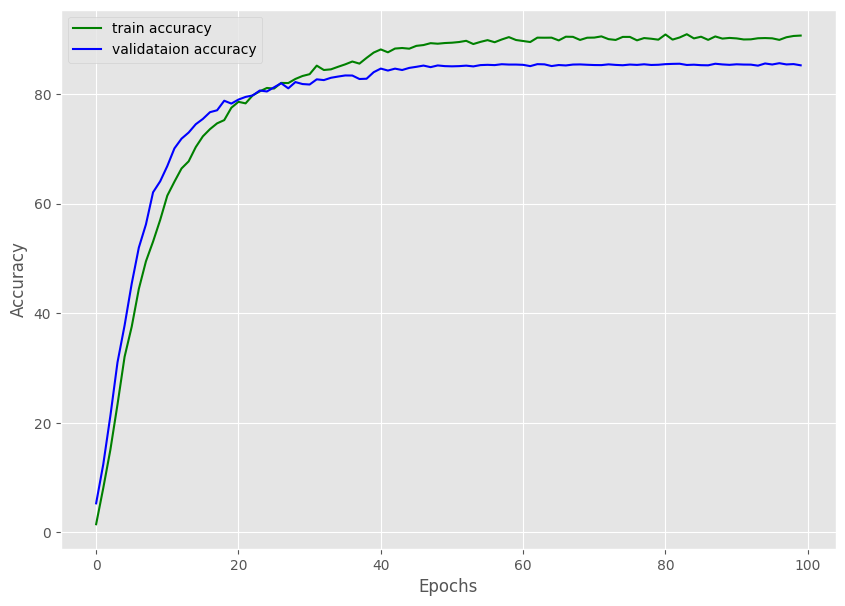

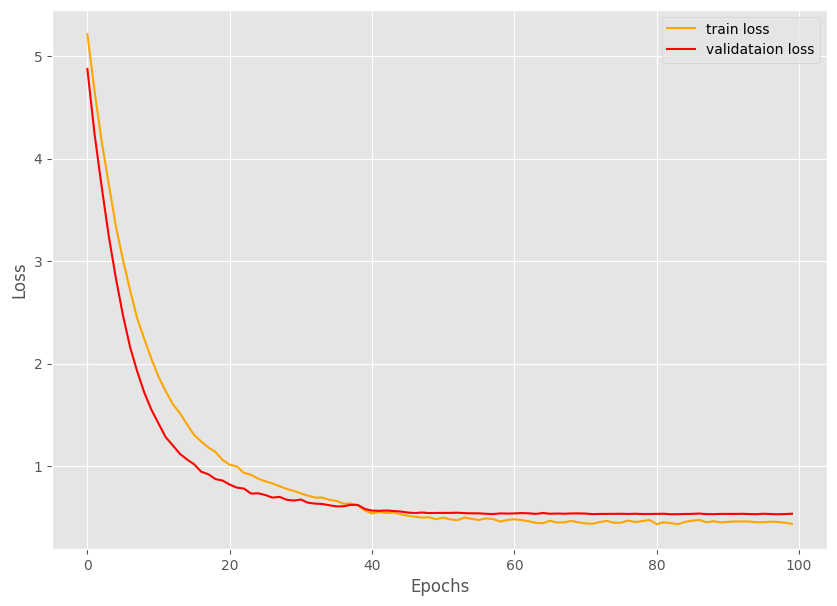

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.optim.lr_scheduler import ReduceLROnPlateau

# 나머지 필요한 임포트는 이미 제공된 코드에 포함되어 있습니다.

# Required constants
image_size = 224
batch_size = 32
num_workers = 4
epochs = 100

# 데이터 변환 정의
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(image_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# 데이터셋과 데이터 로더 설정
image_datasets = {
    'train': datasets.ImageFolder(train_dir, data_transforms['train']),
    'valid': datasets.ImageFolder(valid_dir, data_transforms['valid'])
}

dataloaders = {
    'train': torch.utils.data.DataLoader(image_datasets['train'], batch_size=batch_size, shuffle=True, num_workers=num_workers),
    'valid': torch.utils.data.DataLoader(image_datasets['valid'], batch_size=batch_size, shuffle=False, num_workers=num_workers)
}

# 장치 설정 (GPU 사용 가능 시)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 모델을 정의하고 설정합니다.
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(image_datasets['train'].classes))
model = model.to(device)

# 옵티마이저와 손실 함수를 정의합니다.
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()

# 스케줄러를 정의합니다.
scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2, verbose=True)

# 훈련 및 검증 함수 정의 (train, validate 함수는 이미 정의되어 있다고 가정합니다.)

# 훈련 루프
train_loss, valid_loss = [], []
train_acc, valid_acc = [], []
for epoch in range(epochs):
    # 훈련 및 검증 함수 호출
    train_epoch_loss, train_epoch_acc = train(model, dataloaders['train'], optimizer, criterion)
    valid_epoch_loss, valid_epoch_acc = validate(model, dataloaders['valid'], criterion, dataset_classes)

    # 결과를 리스트에 추가
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    train_acc.append(train_epoch_acc)
    valid_acc.append(valid_epoch_acc)

    # 스케줄러 업데이트
    scheduler.step(valid_epoch_acc)

    # Epoch별 진행 상황을 출력합니다 (옵션)
    print(f'Epoch {epoch+1}/{epochs} - Train Loss: {train_epoch_loss} - Train Acc: {train_epoch_acc} - Valid Loss: {valid_epoch_loss} - Valid Acc: {valid_epoch_acc}')

# 모델, 옵티마이저, 손실함수를 저장합니다.
save_model(epochs, model, optimizer, criterion)

# 정확도 및 손실 그래프를 저장합니다.
save_plots(train_acc, valid_acc, train_loss, valid_loss)

In [9]:
from PIL import Image
import torch

# 이미지를 예측하는 함수
def predict_image(image_path, model, transforms, device):
    image = Image.open(image_path).convert('RGB')
    image = transforms(image).unsqueeze(0)  # 이미지 변환 후 배치 차원 추가
    image = image.to(device)

    model.eval()  # 모델을 평가 모드로 설정
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
        idx_to_class = {v: k for k, v in image_datasets['train'].class_to_idx.items()}
        prediction = idx_to_class[predicted.item()]

    return prediction

# 이미지 분류를 수행하고 전기차 여부를 확인하는 함수
def is_electric_car(prediction):
    electric_cars = ['Fisker Karma Sedan 2012', 'Nissan Leaf Hatchback 2012', 'Tesla Model S Sedan 2012', 'Chevrolet Silverado']
    if prediction in electric_cars:
        return True
    else:
        return False


# 예측 함수를 사용해 이미지 분류하기
image_path = '/content/drive/MyDrive/IOT Hack/archive (4)/car_data/car_data/test/AM General Hummer SUV 2000/00076.jpg'  # 이미지 경로를 입력하세요
prediction = predict_image(image_path, model, data_transforms['valid'], device)  # 'valid'는 사용자가 정의한 키가 되어야 합니다.
print(f'Predicted class for the input image: {prediction}')

# 전기차 여부 확인하기
if is_electric_car(prediction):
    print(f'The predicted car {prediction} is an electric car.')
else:
    print(f'The predicted car {prediction} is not an electric car.')

Predicted class for the input image: AM General Hummer SUV 2000
The predicted car AM General Hummer SUV 2000 is not an electric car.


In [ ]:
 # Train Acc: 90.6925343811395 - Valid Loss: 0.535026212828973 - Valid Acc: 85.2630269866932

In [11]:
image_path = '/content/drive/MyDrive/IOT Hack/archive (4)/car_data/car_data/train/Tesla Model S Sedan 2012/00269.jpg'  # 이미지 경로를 입력하세요
prediction = predict_image(image_path, model, data_transforms['valid'], device)
print(f'Predicted class for the input image: {prediction}')

# 전기차 여부 확인하기
if is_electric_car(prediction):
    print(f'The predicted car {prediction} is an electric car.')
else:
    print(f'The predicted car {prediction} is not an electric car.')

Predicted class for the input image: Tesla Model S Sedan 2012
The predicted car Tesla Model S Sedan 2012 is an electric car.
